In [2]:
# IMPORT DATASET

import pandas as pd

# Load dataset
df = pd.read_csv('/Users/thuyduong/Downloads/stock_details_5_years.csv')

# Preview the data
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [4]:
# INITIAL DATA VALIDATION

# Row count
print(f"Row count: {len(df)}")


Row count: 602962


In [5]:
# Column shape
print(f"Columns: {df.columns.tolist()}")
print(f"Shape: {df.shape}")


Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Company']
Shape: (602962, 9)


In [6]:
# Missing values
df.isnull().sum()


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

In [7]:
# Unique company names
df['Company'].nunique()
df['Company'].value_counts().head()


Company
AAPL    1258
ARES    1258
FAST    1258
WCN     1258
FERG    1258
Name: count, dtype: int64

In [8]:
# EXPLORING DATA

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check time span max/min
time_span_min = df['Date'].min()
time_span_max = df['Date'].max()
print("Time Span:")
print("Start Date:", time_span_min)
print("End Date:", time_span_max)
print("\n")


Time Span:
Start Date: 2018-11-29 00:00:00-05:00
End Date: 2023-11-29 00:00:00-05:00




In [10]:
# Check unique tickers (check if 'Ticker' or 'Company' exists)
if 'Ticker' in df.columns:
    unique_tickers = df['Ticker'].nunique()
    print("Unique Tickers (from 'Ticker'):", unique_tickers)
elif 'Company' in df.columns:
    unique_tickers = df['Company'].nunique()
    print("Unique Tickers (from 'Company'):", unique_tickers)
else:
    print("No Ticker/Company column found.")

print("\n")


Unique Tickers (from 'Company'): 491




In [11]:
# Basic price ranges for Open, Close, High, and Low
price_columns = ['Open', 'Close', 'High', 'Low']
price_ranges = df[price_columns].describe()
print("Basic Price Statistics (Open, Close, High, Low):")
print(price_ranges)


Basic Price Statistics (Open, Close, High, Low):
                Open          Close           High            Low
count  602962.000000  602962.000000  602962.000000  602962.000000
mean      140.074711     140.095204     141.853492     138.276316
std       275.401725     275.477969     279.003191     271.895276
min         1.052425       1.034884       1.061195       1.026114
25%        39.566159      39.563746      40.056222      39.058151
50%        79.177964      79.177906      80.125563      78.193820
75%       157.837190     157.847153     159.746317     155.841609
max      6490.259766    6509.350098    6525.000000    6405.000000


In [12]:
# PROFILING DATA

# Check for duplicate rows based on Date and Company
duplicate_rows = df.duplicated(subset=['Date', 'Company']).sum()
print(f"Duplicate rows based on Date and Company: {duplicate_rows}\n")


Duplicate rows based on Date and Company: 0



In [13]:
# Count records per ticker/company and show summary statistics
record_counts = df['Company'].value_counts()
print("Record count per company (summary statistics):")
print(record_counts.describe(), "\n")


Record count per company (summary statistics):
count     491.000000
mean     1228.028513
std       142.004194
min        54.000000
25%      1258.000000
50%      1258.000000
75%      1258.000000
max      1258.000000
Name: count, dtype: float64 



In [14]:
# Check for days with 0 volume
zero_volume_days = (df['Volume'] == 0).sum()
print(f"Number of rows with 0 trading volume: {zero_volume_days}\n")


Number of rows with 0 trading volume: 331



In [15]:
# Count stock splits and dividends
split_count = df['Stock Splits'].astype(bool).sum() if 'Stock Splits' in df.columns else 'Column not found'
dividend_count = df['Dividends'].astype(bool).sum() if 'Dividends' in df.columns else 'Column not found'

print(f"Number of stock split records: {split_count}")
print(f"Number of dividend records: {dividend_count}")


Number of stock split records: 71
Number of dividend records: 6857


In [20]:
# CLEANING DATA

# Drop rows missing Close values
df_cleaned = df.dropna(subset=['Close'])

# Convert Volume to integer type if not already
df_cleaned['Volume'] = pd.to_numeric(df_cleaned['Volume'], errors='coerce').fillna(0).astype(int)

# Filter out tickers (companies) with less than 1,000 trading days
valid_companies = df_cleaned['Company'].value_counts()
valid_companies = valid_companies[valid_companies >= 1000].index
df_cleaned = df_cleaned[df_cleaned['Company'].isin(valid_companies)]

# Sort by Company and Date, then reset the index
df_cleaned = df_cleaned.sort_values(by=['Company', 'Date']).reset_index(drop=True)

# Display cleaned DataFrame
df_cleaned.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,68.673458,69.589358,68.673458,69.001251,2625800,0.0,0.0,A
1,2018-11-30 00:00:00-05:00,69.059076,70.042470,68.779483,69.753235,2279500,0.0,0.0,A
2,2018-12-03 00:00:00-05:00,70.698073,72.105671,70.563099,71.989975,4265200,0.0,0.0,A
3,2018-12-04 00:00:00-05:00,72.018907,72.414195,70.023203,70.293159,4263800,0.0,0.0,A
4,2018-12-06 00:00:00-05:00,68.644532,69.348335,67.391195,69.329056,3505900,0.0,0.0,A


In [27]:
# 1. Calculate each stock’s annualized return, rolling 12-month momentum, and volatility over the past five years

# Calculate daily returns (percentage change in Close), per company
df_cleaned['Daily_Return'] = df_cleaned.groupby('Company')['Close'].pct_change()

# Calculate 21-day rolling features per company
df_cleaned['Rolling_Mean_21'] = df_cleaned.groupby('Company')['Close'].transform(lambda x: x.rolling(window=21).mean())
df_cleaned['Rolling_Std_21'] = df_cleaned.groupby('Company')['Close'].transform(lambda x: x.rolling(window=21).std())
df_cleaned['Rolling_Vol_21'] = df_cleaned.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=21).std())


In [23]:
import numpy as np

# Drop rows with NaN daily returns
df_returns = df_cleaned.dropna(subset=['Daily_Return'])

# Group by company and compute metrics
agg = df_returns.groupby("Company").agg(
    annualized_return = ("Daily_Return", lambda x: (np.prod(1 + x))**(252/len(x)) - 1),
    vol_daily         = ("Daily_Return", "std"),
    mean_return       = ("Daily_Return", "mean")
)

# Compute annualized volatility and Sharpe ratio
agg["annual_vol"] = agg["vol_daily"] * np.sqrt(252)
agg["sharpe"]     = (agg["mean_return"] * 252 - 0.02) / agg["annual_vol"]

# Print the full table (or just top 10)
print(agg.head(10))  # Use print(agg) if you want all rows


         annualized_return  vol_daily  mean_return  annual_vol    sharpe
Company                                                                 
A                 0.130115   0.018636     0.000659    0.295840  0.493959
AAPL              0.346305   0.020573     0.001392    0.326593  1.013055
ABBV              0.143087   0.016260     0.000665    0.258115  0.571652
ABEV             -0.054813   0.024937     0.000088    0.395858  0.005623
ABT               0.089202   0.016822     0.000480    0.267047  0.378498
ACGL              0.240369   0.020956     0.001076    0.332670  0.754948
ACN               0.174660   0.018024     0.000801    0.286124  0.635388
ADBE              0.201125   0.023481     0.001005    0.372750  0.625606
ADI               0.176841   0.022109     0.000891    0.350968  0.582994
ADM               0.127806   0.017602     0.000633    0.279425  0.499154


In [29]:
# 2. Stocks rank highest by Sharpe ratio (return/volatility) over the period

# Sort the aggregated DataFrame by Sharpe ratio (descending)
top_sharpe = agg.sort_values(by='sharpe', ascending=False)

# Display top 10 companies with the highest Sharpe ratios
top_sharpe_top10 = top_sharpe.head(10)

# Print results
print(top_sharpe_top10)


         annualized_return  vol_daily  mean_return  annual_vol    sharpe
Company                                                                 
NVO               0.391281   0.017815     0.001469    0.282807  1.238461
NVDA              0.654263   0.032849     0.002535    0.521467  1.186766
LLY               0.406360   0.019599     0.001543    0.311129  1.185130
SNPS              0.441345   0.021729     0.001687    0.344932  1.174622
CDNS              0.445032   0.022525     0.001715    0.357580  1.152782
PWR               0.406530   0.022564     0.001608    0.358197  1.075392
ARES              0.426300   0.024029     0.001698    0.381445  1.069592
TRI               0.260066   0.014058     0.001017    0.223164  1.058467
TSLA              0.614327   0.041020     0.002743    0.651173  1.030794
AAPL              0.346305   0.020573     0.001392    0.326593  1.013055


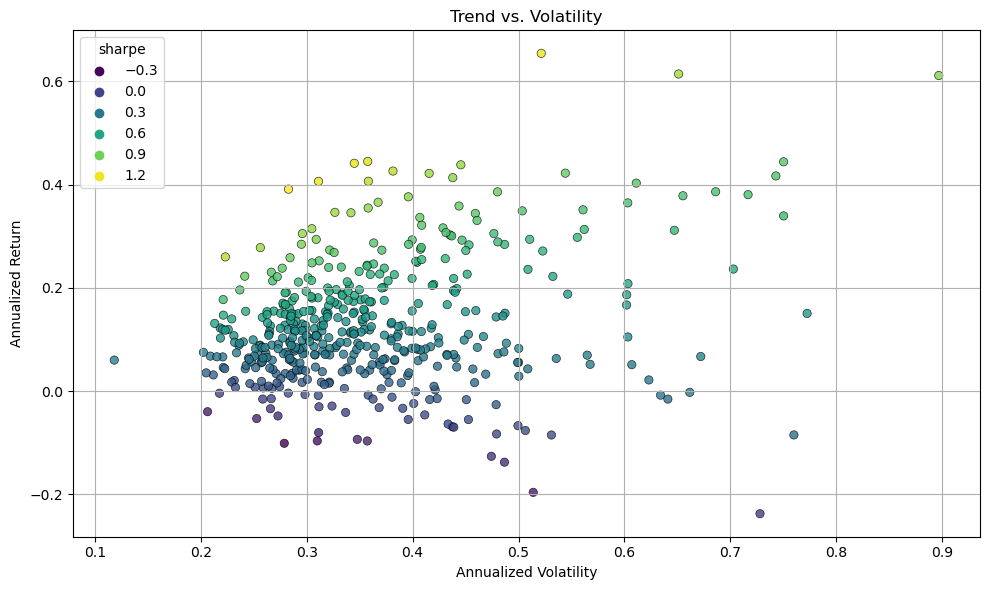

In [30]:
# 3. Vverage trend and volatility metrics differ across S&P sectors

import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Trend (Annualized Return) vs. Volatility (Annualized Volatility)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=agg,
    x='annual_vol',
    y='annualized_return',
    hue='sharpe',
    palette='viridis',
    edgecolor='k',
    alpha=0.8
)
plt.title("Trend vs. Volatility")
plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.grid(True)
plt.tight_layout()
plt.show()


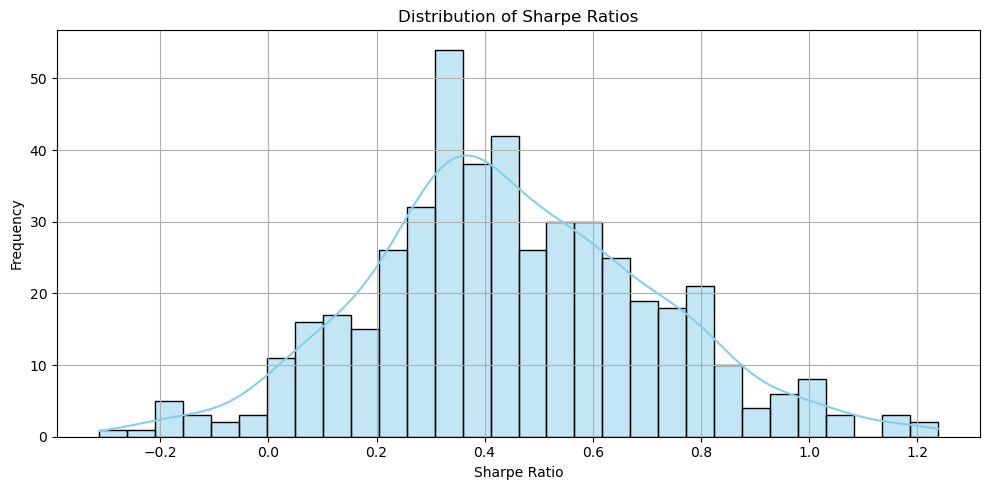

In [31]:
# Plot 2: Sharpe Ratio Histogram
plt.figure(figsize=(10, 5))
sns.histplot(
    data=agg,
    x='sharpe',
    bins=30,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title("Distribution of Sharpe Ratios")
plt.xlabel("Sharpe Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


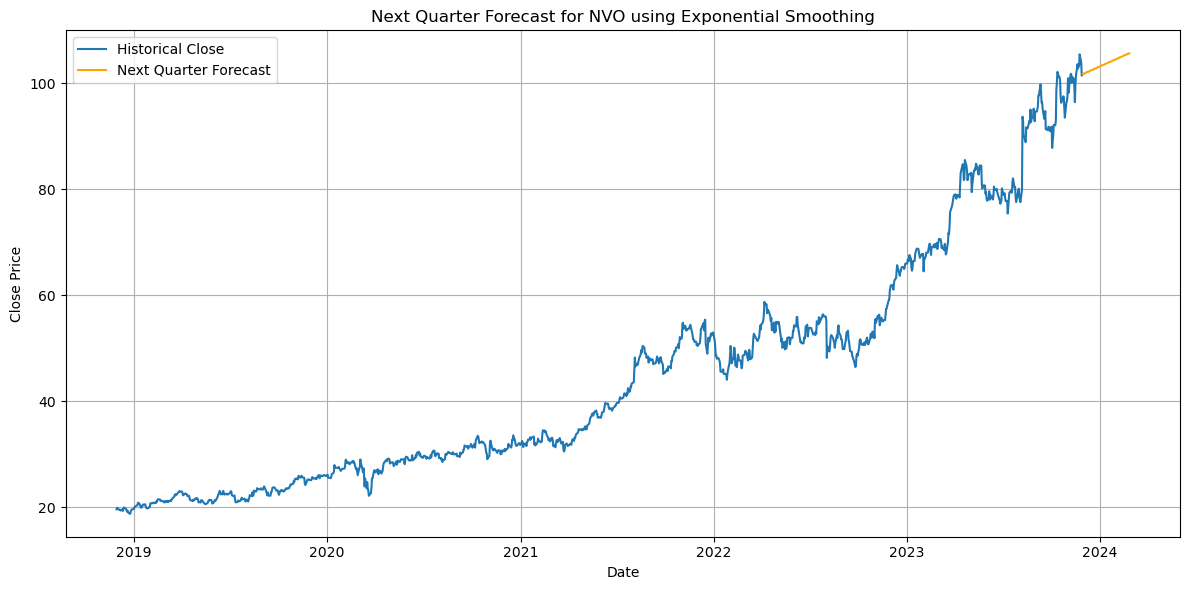

In [32]:
# 4. Use time-series model (exponential smoothing) to predict next-quarter returns for high-Sharpe stocks

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Choose one top-performing ticker by Sharpe ratio
top_ticker = agg.sort_values(by='sharpe', ascending=False).index[0]

# Step 2: Filter the data for that ticker
df_ticker = df_cleaned[df_cleaned['Company'] == top_ticker].copy()

# Step 3: Strip timezone info from 'Date'
df_ticker['Date'] = df_ticker['Date'].apply(lambda x: x.replace(tzinfo=None))

# Step 4: Set Date as index and reindex to business days
df_ticker.set_index('Date', inplace=True)
df_ticker = df_ticker[~df_ticker.index.duplicated()]
biz_index = pd.date_range(start=df_ticker.index.min(), end=df_ticker.index.max(), freq='B')
df_biz = df_ticker.reindex(biz_index)
df_biz['Close'] = df_biz['Close'].ffill()  # fill missing values

# Step 5: Fit Exponential Smoothing model
model = ExponentialSmoothing(df_biz['Close'], trend='add', seasonal=None)
model_fit = model.fit()

# Step 6: Forecast the next quarter (~63 business days)
forecast = model_fit.forecast(63)

# Step 7: Plot historical Close and forecast
plt.figure(figsize=(12, 6))
plt.plot(df_biz['Close'], label='Historical Close')
plt.plot(forecast, label='Next Quarter Forecast', color='orange')
plt.title(f"Next Quarter Forecast for {top_ticker} using Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
# 5. Under a 5% overall market downturn, how do our top 50 candidates’ forecast distributions shift

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# STEP 1: Select Top 50 Companies by Sharpe Ratio
top_50_companies = agg.sort_values(by='sharpe', ascending=False).head(50)

# STEP 2: Prepare DataFrames to Store Forecasts
forecast_df = pd.DataFrame()
downturn_df = pd.DataFrame()

# STEP 3: Loop through each ticker and build forecasts
for ticker in top_50_companies.index:
    # Filter and prepare data for ticker
    df_ticker = df_cleaned[df_cleaned['Company'] == ticker][['Date', 'Close']].copy()
    df_ticker['Date'] = df_ticker['Date'].apply(lambda x: x.replace(tzinfo=None))
    df_ticker.set_index('Date', inplace=True)
    df_ticker = df_ticker[~df_ticker.index.duplicated()]

    # Reindex to business days and forward fill
    biz_index = pd.date_range(start=df_ticker.index.min(), end=df_ticker.index.max(), freq='B')
    df_biz = df_ticker.reindex(biz_index)
    df_biz['Close'] = df_biz['Close'].ffill()

    # Fit ETS model and forecast
    model = ExponentialSmoothing(df_biz['Close'], trend='add', seasonal=None)
    model_fit = model.fit()
    forecast = model_fit.forecast(63)

    # Store forecast and downturn-adjusted forecast
    forecast_df[ticker] = forecast
    downturn_df[ticker] = forecast * 0.95  # Apply 5% drop

# STEP 4: Format output
forecast_df.index.name = "Date"
downturn_df.index.name = "Date"
top_50_metrics = top_50_companies[['annualized_return', 'annual_vol', 'sharpe']]

# Optional: Display or export
print("Top 50 metrics:")
print(top_50_metrics.head())

print("\nForecast shape:", forecast_df.shape)
print("Downturn forecast shape:", downturn_df.shape)
print("\nSample forecast:")
print(forecast_df.head())
print("\nSample downturn:")
print(downturn_df.head())


Top 50 metrics:
         annualized_return  annual_vol    sharpe
Company                                         
NVO               0.391281    0.282807  1.238461
NVDA              0.654263    0.521467  1.186766
LLY               0.406360    0.311129  1.185130
SNPS              0.441345    0.344932  1.174622
CDNS              0.445032    0.357580  1.152782

Forecast shape: (63, 50)
Downturn forecast shape: (63, 50)

Sample forecast:
                   NVO        NVDA         LLY        SNPS        CDNS  \
Date                                                                     
2023-11-30  101.727943  481.055227  591.793611  554.708523  276.729946   
2023-12-01  101.790885  481.393939  592.164377  555.064971  276.908171   
2023-12-04  101.853827  481.732651  592.535142  555.421420  277.086396   
2023-12-05  101.916770  482.071364  592.905908  555.777868  277.264620   
2023-12-06  101.979712  482.410076  593.276673  556.134317  277.442845   

                   PWR        ARES         T